In [5]:
from IPython.display import Image
from os import chdir
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import argparse

In [6]:
st = gd.SimplexTree()  ## 

In [7]:
#insert 0-simplex (the vertex), 
st.insert([0])
st.insert([1])
st.insert([2])



True

In [8]:
# Insert 1-simplices at different filtration levels
st.insert([0, 2], filtration=1)
st.insert([1, 2], filtration=3)
st.insert([0, 1], filtration=2)
st.insert([0, 1,2 ], filtration=4)

True

In [9]:
num_vertices = st.num_vertices()
num_simplices = st.num_simplices()

print("Number of vertices:", num_vertices)
print("Number of simplices:", num_simplices)

Number of vertices: 3
Number of simplices: 7


In [10]:
# Compute the persistence diagram
persistence_diagram = st.persistence()

# Print the persistence diagram
for point in persistence_diagram:
    birth = point[0]
    death = point[1]
    print("Birth:", birth)
    print("Death:", death)
    print()

Birth: 1
Death: (3.0, 4.0)

Birth: 0
Death: (0.0, inf)

Birth: 0
Death: (0.0, 2.0)

Birth: 0
Death: (0.0, 1.0)



(array([-1. ,  0. ,  1. ,  2. ,  3. ,  4. ,  4.4]),
 [Text(0, -1.0, '-1.000'),
  Text(0, 0.0, '0.000'),
  Text(0, 1.0, '1.000'),
  Text(0, 2.0, '2.000'),
  Text(0, 3.0, '3.000'),
  Text(0, 4.0, '4.000'),
  Text(0, 4.4, '$+\\infty$')])

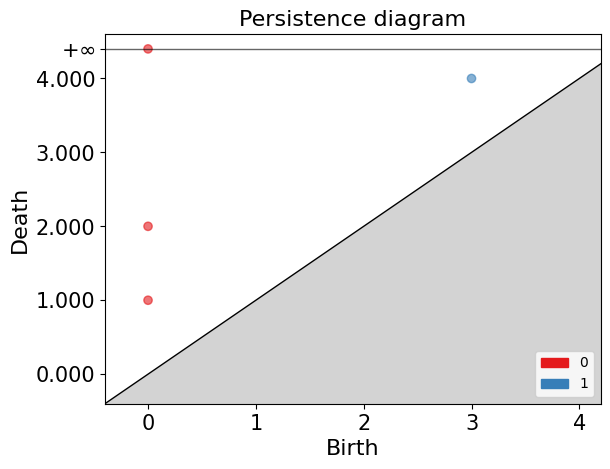

In [12]:
gd.plot_persistence_diagram(persistence_diagram,legend=True)
#plt.grid(color = 'black', linestyle = '-', linewidth = 1)
#plt.savefig('persitencediagramCircles.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0')])

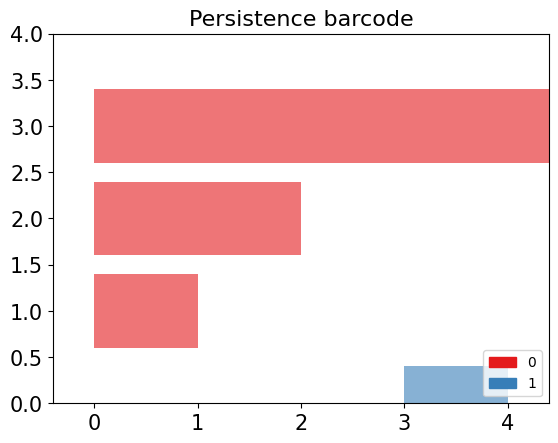

In [13]:
gd.plot_persistence_barcode(persistence_diagram,legend=True)
#plt.grid(color = 'black', linestyle = '-', linewidth = 1)
#plt.savefig('persistencebarcodeCircles' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)

In [ ]:
Ejercicio

### ejemplo 2

In [14]:
from sklearn import datasets
circles, labels = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)
print('Data dimension:{}'.format(circles.shape))

Data dimension:(1000, 2)


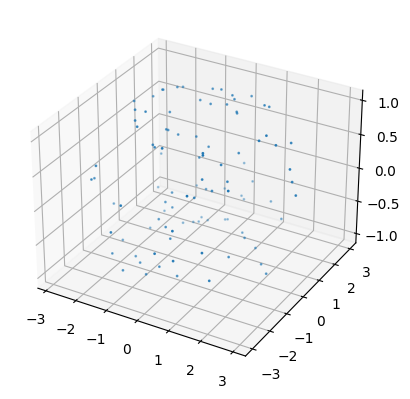

In [3]:
import tadasets
torus = tadasets.torus(n=100)
tadasets.plot3d(torus, s = 1)
plt.show()

In [4]:
import tadasets
import gudhi



# Create a Rips complex from the torus points
rips_complex = gudhi.RipsComplex(points=torus)

# Obtain the simplicial complex
simplicial_complex = rips_complex.create_simplex_tree(max_dimension=2)

# Compute the persistent homology of the simplicial complex
persistence = simplicial_complex.persistence()

# Print the persistence intervals
for interval in persistence:
    print(interval)


(1, (0.9831518728935549, 1.973382703627488))
(1, (1.1459775766658398, 1.8332578943502313))
(1, (1.2346991086980785, 1.9021376112083697))
(1, (1.2960811019234644, 1.7707980805483954))
(1, (1.0897668282890796, 1.5416545598327618))
(1, (1.4185007699183971, 1.8312120762424016))
(1, (1.469527380400187, 1.8192133453358206))
(1, (1.1283468248353132, 1.4089988581751636))
(1, (1.5555713001448002, 1.7991051243365914))
(1, (1.4106209873834363, 1.6341629938546816))
(1, (1.2007031146611193, 1.3812815990298573))
(1, (1.4383409993638725, 1.597558186645472))
(1, (0.8153127430594501, 0.9470255384099958))
(1, (1.1132653093328584, 1.2039989045411146))
(1, (0.4783138394316455, 0.5641066654258161))
(1, (0.8654257353247435, 0.9510876186913745))
(1, (1.0185560280116002, 1.0964908745907258))
(1, (1.550260283932466, 1.6184161565242483))
(1, (1.264132933713075, 1.3312494021485914))
(1, (0.8395095108541614, 0.9037181341399548))
(1, (1.2668953551519984, 1.3296971265485096))
(1, (1.5054253774076036, 1.558000603404

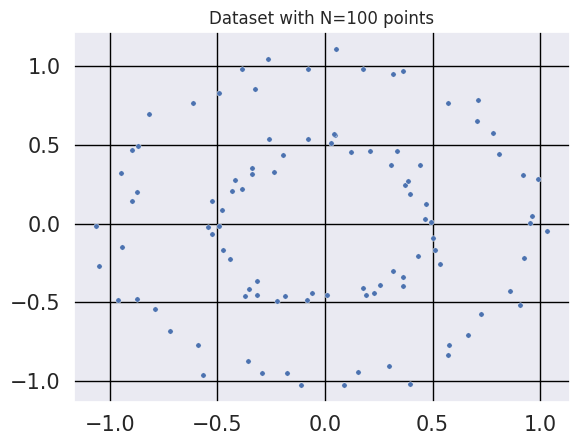

In [13]:
import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x=circles[:,0], y=circles[:,1],   s=15)
plt.title('Dataset with N=%s points'%(circles.shape[0]))
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('circles2.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [14]:
%%time
Rips_complex = gd.RipsComplex(circles, max_edge_length=0.6) 


CPU times: user 0 ns, sys: 214 µs, total: 214 µs
Wall time: 217 µs


In [15]:
%%time

Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=3) 

CPU times: user 712 µs, sys: 612 µs, total: 1.32 ms
Wall time: 645 µs


In [18]:
%%time

filt_Rips = list(Rips_simplex_tree.get_filtration())

CPU times: user 2.72 ms, sys: 2.91 ms, total: 5.64 ms
Wall time: 5.63 ms


In [20]:
%%time

diag_Rips = Rips_simplex_tree.persistence()

CPU times: user 4.13 ms, sys: 126 µs, total: 4.26 ms
Wall time: 3.58 ms


CPU times: user 581 ms, sys: 191 ms, total: 771 ms
Wall time: 547 ms


(array([-0.1       ,  0.        ,  0.1       ,  0.2       ,  0.3       ,
         0.4       ,  0.5       ,  0.62569893]),
 [Text(0, -0.1, '-0.100'),
  Text(0, 0.0, '0.000'),
  Text(0, 0.1, '0.100'),
  Text(0, 0.20000000000000004, '0.200'),
  Text(0, 0.30000000000000004, '0.300'),
  Text(0, 0.4, '0.400'),
  Text(0, 0.5000000000000001, '0.500'),
  Text(0, 0.6256989291775961, '$+\\infty$')])

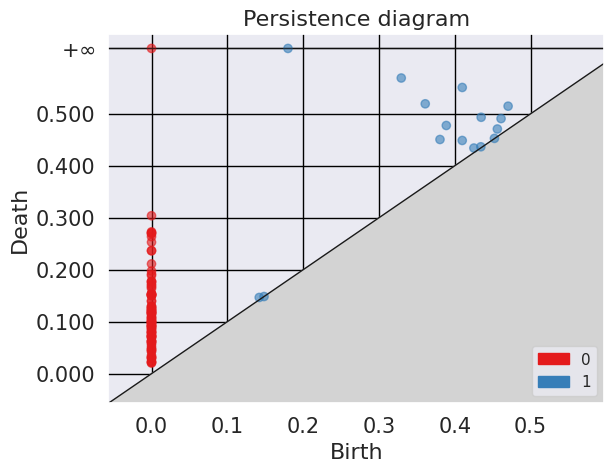

In [21]:
%%time
gd.plot_persistence_diagram(diag_Rips,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persitencediagramCircles.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)

CPU times: user 548 ms, sys: 162 ms, total: 710 ms
Wall time: 505 ms


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

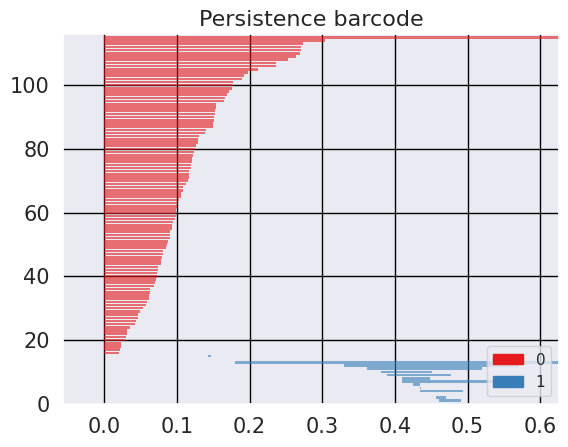

In [23]:
%%time
gd.plot_persistence_barcode(diag_Rips,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persistencebarcodeCircles' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)

## example 3

In [24]:
from gudhi.datasets.generators import _points
from gudhi import AlphaComplex

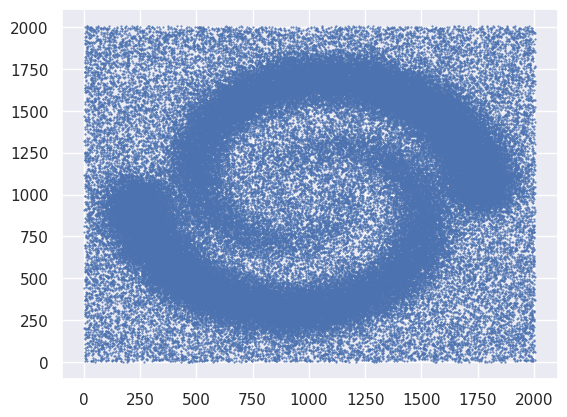

In [25]:
import requests
#load the file spiral_2d.csv
url = 'https://raw.githubusercontent.com/paumayell/pangenomics/gh-pages/files/spiral_2d.csv'
# Obtener el contenido del archivo
response = requests.get(url)
content = response.text
# Cargar los datos en un arreglo de NumPy
data = np.loadtxt(content.splitlines(), delimiter=' ')
# Graficar los puntos
plt.scatter(data[:, 0], data[:, 1], marker='.', s=1)
plt.show()

In [26]:
alpha_complex = AlphaComplex(points = data)
simplex_tree = alpha_complex.create_simplex_tree()

diag= [(1, (36.786960999999884, 382.50798344519836)), (1, (37.437735250000095, 354.80811947619907)), (1, (10.519391249999968, 318.82745487830704)), (1, (33.23762500000002, 337.42444195315494)), (1, (39.26471400000028, 325.582861632846)), (1, (36.49322725000049, 321.8682981684395)), (1, (27.736225000000196, 311.0973220725989)), (1, (26.786384000000275, 304.44892929141713)), (1, (41.02531600000011, 318.61257029664444)), (1, (51.52551400000013, 325.18851609130695)), (1, (48.43566900000006, 320.03259402908327)), (1, (36.81548525000025, 299.2886227401021)), (1, (49.48172499999947, 310.83506973343754)), (1, (27.028249999999474, 288.31311043080336)), (1, (29.045000000000762, 279.0265703385672)), (1, (43.31710100000019, 288.0127965136712)), (1, (36.90162099999996, 277.44396852003706)), (1, (33.991206249998996, 272.3974033869022)), (1, (37.17210400000094, 273.3437043825977)), (1, (39.699577249999834, 275.8262369895033)), (1, (37.215880999999435, 267.9110542554257)), (1, (36.88902100000004, 260.

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

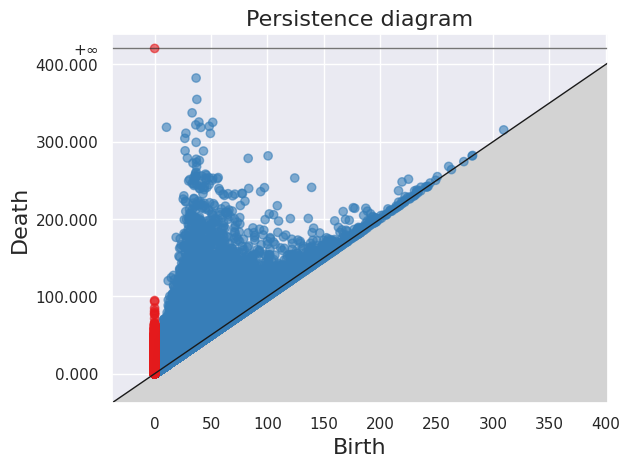

In [27]:
diag = simplex_tree.persistence()
diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print("diag=", diag)

gd.plot_persistence_diagram(diag)

/miniconda3/envs/TDA/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:83: UserWarning: There are 229062 intervals given as input, whereas max_intervals is set to 20000.
  % (len(persistence), max_intervals)


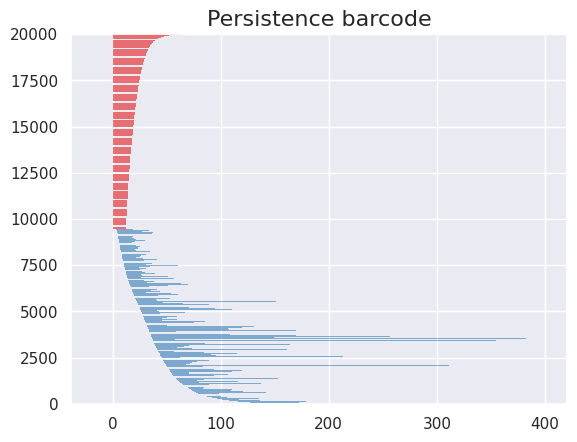

In [28]:
gd.plot_persistence_barcode(diag)
#plt.savefig('persistence_barcodeSpiral.svg' , dpi=1200)
plt.show()